# 📌 Demonstration of GridMaster Usage

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from gridmaster import GridMaster
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", message=".*does not have valid feature names.*")

# 1. Load dataset

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize GridMaster with selected models

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
gm = GridMaster(
    models=['logistic', 'random_forest', 'xgboost', 'lightgbm', 'catboost'],
    X_train=X_train,
    y_train=y_train
)

# 3. Run multi-stage tuning for each model

In [5]:
for model in ['logistic', 'random_forest', 'xgboost', 'lightgbm', 'catboost']:
    gm.multi_stage_search(model, scoring='f1')

model
[Coarse Grid Search] logistic
[STAGE1 Grid Search] scale=0.5, steps=5
[STAGE2 Grid Search] scale=0.2, steps=5
model
[Coarse Grid Search] random_forest
[STAGE1 Grid Search] scale=0.5, steps=5
[STAGE2 Grid Search] scale=0.2, steps=5
model
[Coarse Grid Search] xgboost
[STAGE1 Grid Search] scale=0.5, steps=5
[STAGE2 Grid Search] scale=0.2, steps=5
model
[Coarse Grid Search] lightgbm
[STAGE1 Grid Search] scale=0.5, steps=5
[STAGE2 Grid Search] scale=0.2, steps=5
model
[Coarse Grid Search] catboost
[STAGE1 Grid Search] scale=0.5, steps=5
[STAGE2 Grid Search] scale=0.2, steps=5


# 4. Compare all models using multiple metrics

In [6]:
best_model, scores_df = gm.compare_best_models(X_test, y_test, metrics=['accuracy', 'f1', 'roc_auc'])
print("Best model based on rank sum:", best_model)
print(scores_df)

Best model based on rank sum: logistic
               accuracy      f1  roc_auc  score
logistic         0.9912  0.9930   0.9987    3.0
random_forest    0.9649  0.9722   0.9961   11.0
xgboost          0.9561  0.9650   0.9912   15.0
lightgbm         0.9737  0.9790   0.9931    9.0
catboost         0.9737  0.9790   0.9977    7.0


# 5. Generate visual diagnostics for all models


🔎 Visualizing diagnostics for LOGISTIC...


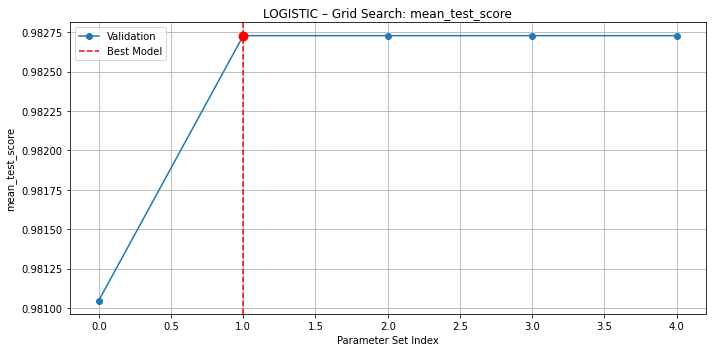

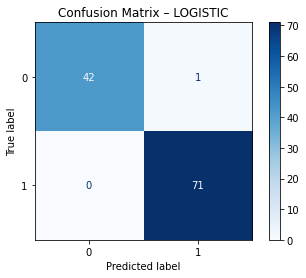

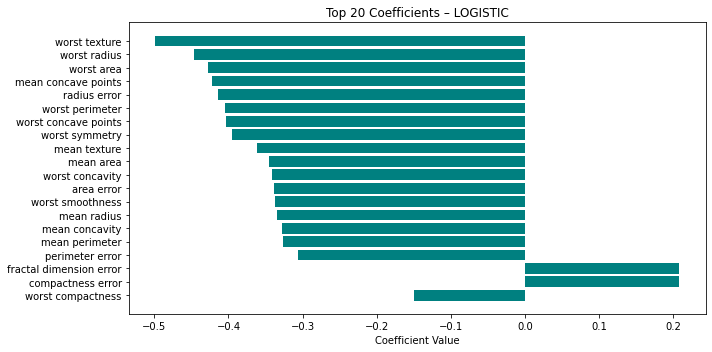


🔎 Visualizing diagnostics for RANDOM_FOREST...


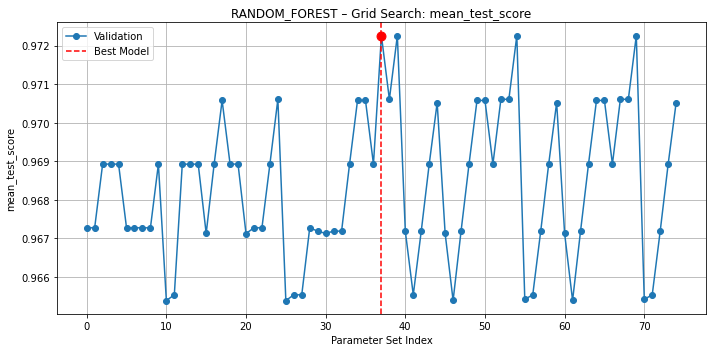

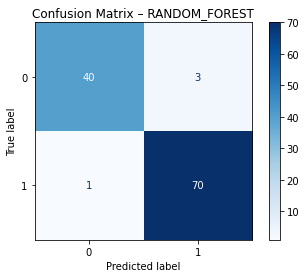

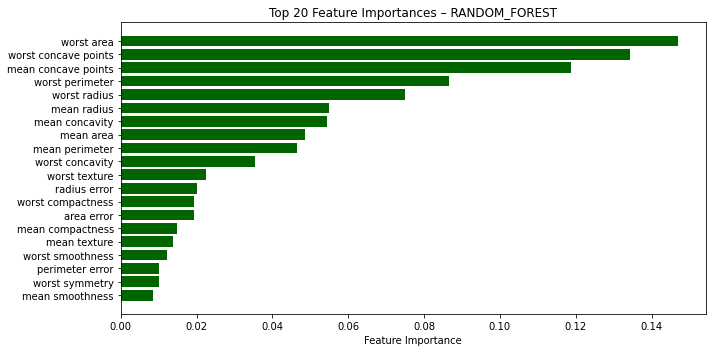


🔎 Visualizing diagnostics for XGBOOST...


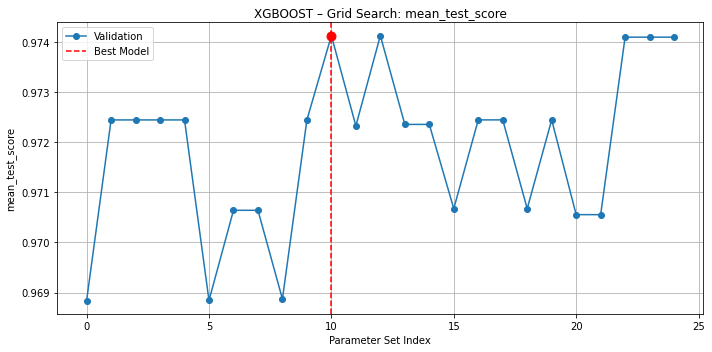

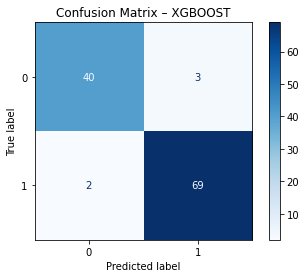

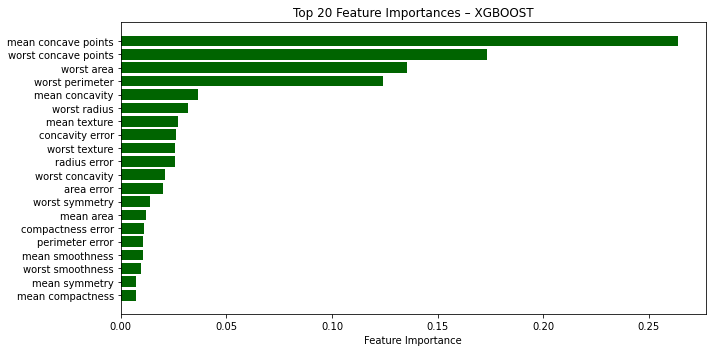


🔎 Visualizing diagnostics for LIGHTGBM...


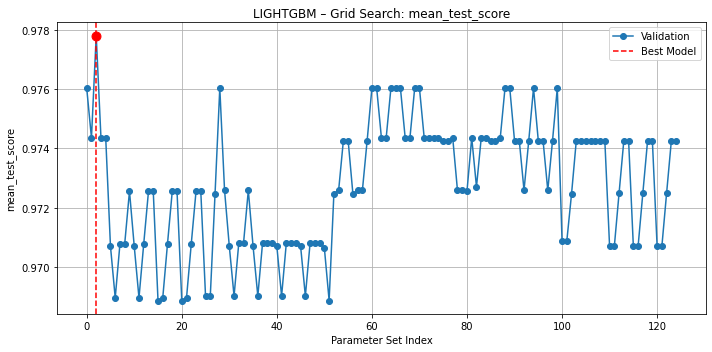

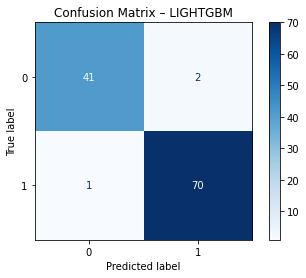

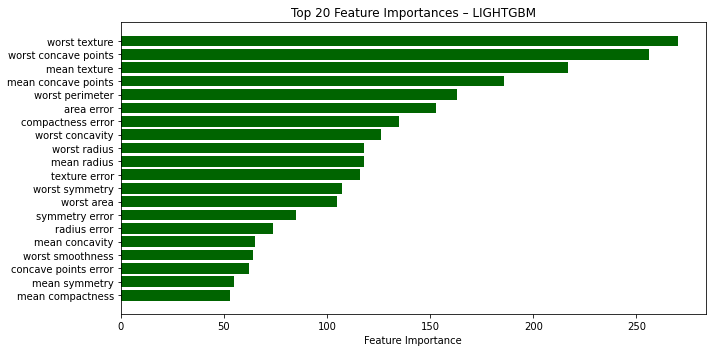


🔎 Visualizing diagnostics for CATBOOST...


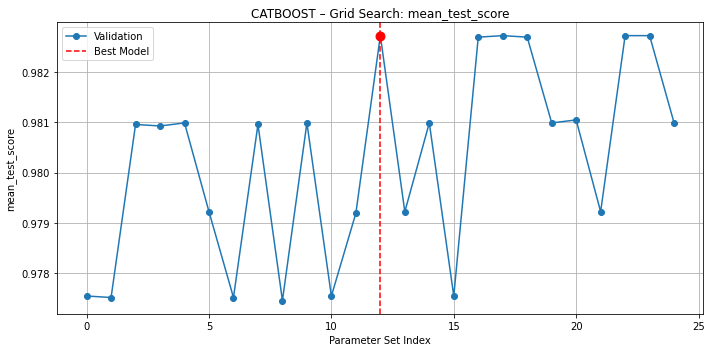

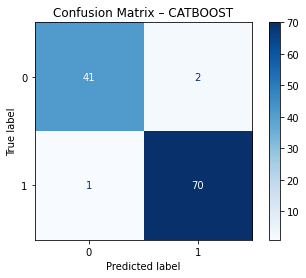

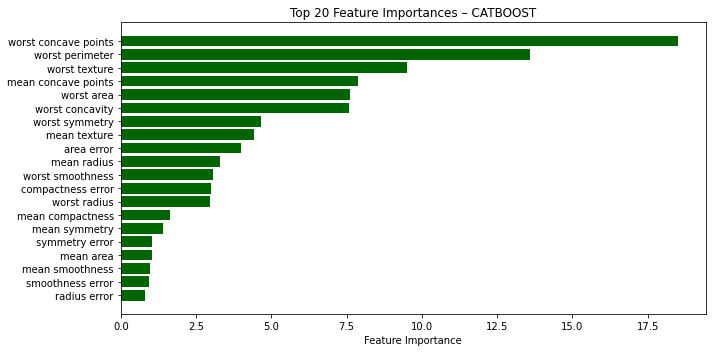

In [7]:
for model in ['logistic', 'random_forest', 'xgboost', 'lightgbm', 'catboost']:
    print(f"\n🔎 Visualizing diagnostics for {model.upper()}...")
    gm.plot_cv_score_curve(model)
    gm.plot_confusion_matrix(model, X_test, y_test)
    if model == 'logistic':
        gm.plot_model_coefficients(model)
    else:
        gm.plot_feature_importance(model)


# Optional: Plot coefficient or importance

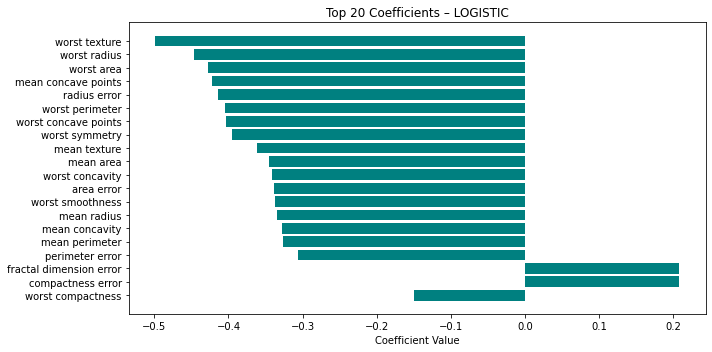

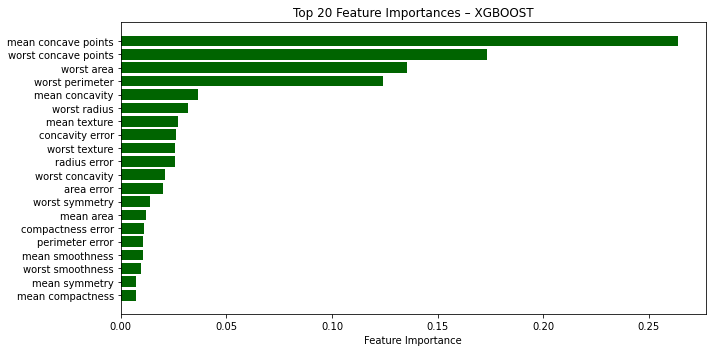

In [8]:
gm.plot_model_coefficients('logistic')
gm.plot_feature_importance('xgboost')

# 6. Export and reload model packages

In [9]:
os.makedirs('outputs', exist_ok=True)
gm.export_all_models(folder_path='outputs')
gm.import_all_models(folder_path='outputs')

[⚠️ Skipped] lightgbm_20250429_223105: [Errno 2] No such file or directory: 'outputs/lightgbm/model_final.joblib'
[⚠️ Skipped] random_forest_20250429_223105: [Errno 2] No such file or directory: 'outputs/random/model_final.joblib'
[⚠️ Skipped] logistic_20250429_223105: [Errno 2] No such file or directory: 'outputs/logistic/model_final.joblib'
[⚠️ Skipped] xgboost_20250429_223105: [Errno 2] No such file or directory: 'outputs/xgboost/model_final.joblib'
[⚠️ Skipped] catboost_20250429_223105: [Errno 2] No such file or directory: 'outputs/catboost/model_final.joblib'


# 7. Print classification report on best model

In [10]:
print(f"\n🏆 Best Model: {best_model.upper()}")
print("Best Parameters:")
print(gm.results[best_model]['best_model'].best_params_)

X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
y_pred = gm.results[best_model]['best_model'].predict(X_test_df)

print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


🏆 Best Model: LOGISTIC
Best Parameters:
{'clf__C': 0.0675, 'clf__penalty': 'l2'}

📋 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

